In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [40]:
#step 1: download dataset

In [41]:
#download dataset from kaggle

In [42]:
train_df = pd.read_csv('C:/Users/howardwoo/Desktop/springboard/capstone two/lecture02/house price/input/train.csv',index_col = 0)
test_df = pd.read_csv('C:/Users/howardwoo/Desktop/springboard/capstone two/lecture02/house price/input/test.csv',index_col = 0)

In [43]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
#step 2: merge dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D90E185FC8>,
      dtype=object)

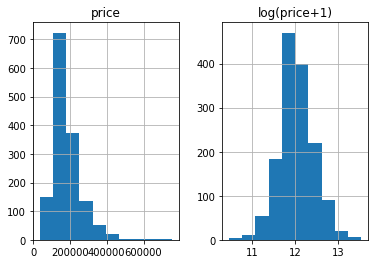

In [45]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [46]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [47]:
all_df = pd.concat((train_df, test_df), axis = 0) #merge all dataset and for further operations

In [48]:
all_df.shape

(2919, 79)

In [49]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [50]:
#step 3: feature engineering and data wrangling 

In [51]:
#take the "MSSubClass" as example, this feature should be a category variable, we need transfer this varialbe into a numerical variable

In [52]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [53]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str) #change the type to string

In [54]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [55]:
# create dummy features for categorical variables

In [56]:
pd.get_dummies(all_df['MSSubClass'], prefix = 'MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [57]:
#extend this method to all categorical variables 

all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [58]:
# deal with all missing numerical variables

In [59]:
all_dummy_df.isnull().sum().sort_values(ascending = False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtUnfSF         1
GarageArea        1
TotalBsmtSF       1
GarageCars        1
BsmtFinSF2        1
dtype: int64

In [60]:
# we use mean value to fill those missing values

In [61]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [62]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [63]:
#check if there is any null
all_dummy_df.isnull().sum().sum()

0

In [64]:
#standardize the magnitude of numeric features data

In [65]:
numeric_cols = all_df.columns[all_df.dtypes != 'object' ]
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [66]:
numeric_col_means = all_dummy_df.loc[:,numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [67]:
# step 4: construct a model and model selection 
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [68]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [69]:
#ridge regression with cross validation
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


In [70]:
X_train = dummy_train_df.values
X_tret = dummy_test_df.values

In [ ]:
# model selection

In [71]:
#use Ridge Regression
alphas = np.logspace(-3,2,100)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train, cv= 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

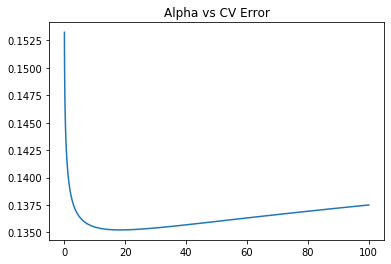

In [72]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

In [73]:
#use Random Forest
from sklearn.ensemble import RandomForestRegressor 
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [76]:
print(test_scores)

[0.1405661734894986, 0.13808983153599075, 0.13823878768054215, 0.1401832218079035, 0.14210151217228392, 0.1426978205449668]


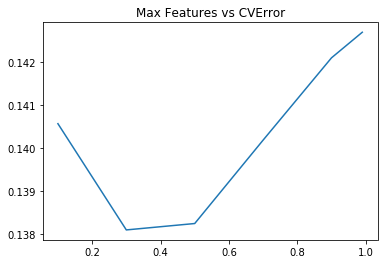

In [77]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CVError");

In [ ]:
#as we knew the best params from ridge Regression is 15, so we use 15 for the bgging regression 

In [81]:
# use Bagging
from sklearn.ensemble import BaggingRegressor

In [85]:
ridge = Ridge(15)

In [87]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators = param, base_estimator = ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [90]:
print(test_scores)

[0.13998487108360008, 0.13295195212298322, 0.13394938534882422, 0.13379974581425116, 0.13475642377031277, 0.1337788299305057, 0.13448865844725263]


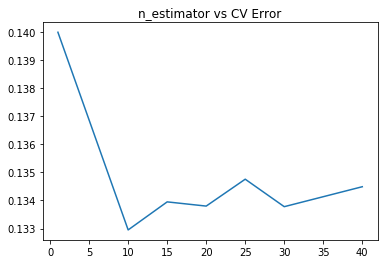

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title('n_estimator vs CV Error');

In [ ]:
#okay, right now,we decrease the alpha value to 0.134, better result than Ridge Regression 

In [ ]:
#give Boosting Regression a try
from sklearn.ensemble import AdaBoostRegressor 


In [ ]:
params = [10,]